# Lab 5: KNN
In this assignment, we will learn the KNN model.

First, please study the given example, which uses the KNN model for the breast cancer classification task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model.

Based on the given example, your task is to use the KNN model to predict the presence of heart disease.

## 1. Example

### 1.1 Load the breast cancer data

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


### 1.2 Split the data into two subsets and normalize the features of samples

In [2]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 500, test: 69


### 1.3 Train the KNN model and select the hyperparameter with cross-validation

In [3]:
# ignore warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.9640000000000001
{'n_neighbors': 4}


### 1.4 Evaluate the learned model

In [4]:
clf_knn =  KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.971, recall: 0.975, precision: 0.975, f1: 0.975,


## 2. Task

### 2.1 Preprocess the raw data
- Check whether there are missing values
- Check whether theare are cateogrical features
- Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)


In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/maryle2002/CIS3715_DataScience_2023/main/Lab05/heart.csv')

In [6]:
# Check whether there are missing values
print(df.isnull().sum())
print("\n\033[1mThere are no missing values")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values


In [7]:
# Check whether theare are cateogrical features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None



The dataset is balanced



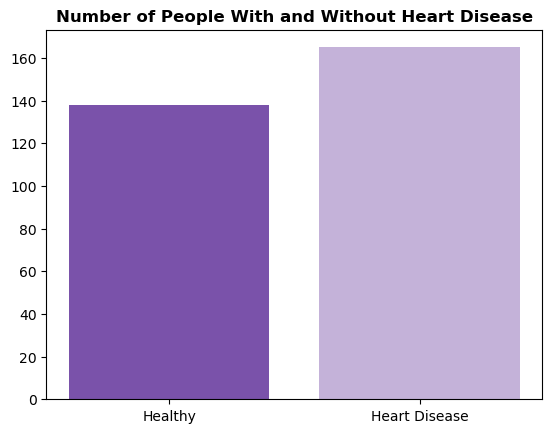

In [8]:
import matplotlib.pyplot as plt

# Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values, color = ['#c4b2d9','#7a52aa'])
plt.xticks([0,1],['Healthy','Heart Disease'])
plt.title('Number of People With and Without Heart Disease', fontweight='heavy')
print('\n\033[1mThe dataset is balanced\n')

### 2.2 Split the data into two subsets and normalize the features of samples
- Split the dataset into the train_val set and testing set.
- Normalize features

In [9]:
# Check for possible test sizes for 5-fold cross validation
folds = 5
possible_test_sizes = [round(1 - x/df.shape[0], ndigits=4) for x in range(220, 303, folds)]
print(possible_test_sizes)
print('\n\033[1mI choose 0.2079 as the test size')

[0.2739, 0.2574, 0.2409, 0.2244, 0.2079, 0.1914, 0.1749, 0.1584, 0.1419, 0.1254, 0.1089, 0.0924, 0.0759, 0.0594, 0.0429, 0.0264, 0.0099]

I choose 0.2079 as the test size


In [10]:
# Split the dataset into the train_val set and testing set
heart_data = df.drop('target', axis = 1).values
heart_disease = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heart_data, heart_disease, 
                                                            test_size = 0.2079, 
                                                            random_state = 0)
print(f'samples: {heart_data.shape[0]}, train_val: {X_train_val.shape[0]}, test: {X_test.shape[0]}')

samples: 303, train_val: 240, test: 63


In [11]:
# Normalize features
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

### 2.3 Train the KNN model and select the hyperparameter with cross-validation
- Use the 5-fold cross-validation to select the hyperparameter K.
- Search K from {1, 2, 3, 4, 5}

In [12]:
k_range = range(1, 6)
param_grid = dict(n_neighbors=k_range)

clf_knn = KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_val, y_train_val)

print(grid.best_score_)
print(grid.best_params_)

0.8125
{'n_neighbors': 5}


### 2.4 Evaluate the learned model
- Report the prediction accuracy, recall, precision, and F1 score.
- Note that you should implement the code for these metrics by yourself. Please do NOT use the built-in function in sklearn.

In [13]:
clf_knn =  KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
clf_knn.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf_knn.predict(X_test)

Define functions to calculate accuracy, recall, precision, and F1 score:

In [14]:
def calculate_true_positive(y, y_hat):
    return np.sum([a == 1 and b == 1 for (a, b) in zip(y, y_hat)])

def calculate_false_positive(y, y_hat):
    return np.sum([a == 0 and b == 1 for (a, b) in zip(y, y_hat)])

def calculate_false_negative(y, y_hat):
    return np.sum([a == 1 and b == 0 for (a, b) in zip(y, y_hat)])

def calculate_true_negative(y, y_hat):
    return np.sum([a == 0 and b == 0 for (a, b) in zip(y, y_hat)])

def calculate_accuracy(y, y_hat):
    number_of_correct_predictions = np.sum(y == y_hat)
    total_number_of_predictions = y.size
    return number_of_correct_predictions / total_number_of_predictions

def calculate_recall(y, y_hat):
    tp = calculate_true_positive(y, y_hat)
    fn = calculate_false_negative(y, y_hat)
    return tp / (tp + fn)

def calculate_precision(y, y_hat):
    tp = calculate_true_positive(y, y_hat)
    fp = calculate_false_positive(y, y_hat)
    return tp / (tp + fp)

def calculate_f1(y, y_hat):
    recall = calculate_recall(y, y_hat)
    precision = calculate_precision(y, y_hat)
    return (2 * recall * precision) / (recall + precision)

In [15]:
print(f'accuracy: {calculate_accuracy(y_test, y_test_pred)}, recall: {calculate_recall(y_test, y_test_pred)}, precision: {calculate_precision(y_test, y_test_pred)}, f1: {calculate_f1(y_test, y_test_pred)}')


accuracy: 0.8253968253968254, recall: 0.8611111111111112, precision: 0.8378378378378378, f1: 0.8493150684931507


Verify calculations using sklearn:

In [16]:
ml_acc = accuracy_score(y_test, y_test_pred)
ml_f1 = f1_score(y_test, y_test_pred)
ml_recall = recall_score(y_test, y_test_pred)
ml_precision = precision_score(y_test, y_test_pred)

print(f'accuracy: {ml_acc:.3f}, recall: {ml_recall:.3f}, precision: {ml_precision:.3f}, f1: {ml_f1:.3f}')

accuracy: 0.825, recall: 0.861, precision: 0.838, f1: 0.849
